In [129]:
import pandas as pd
import numpy as np

# Importing Datasets

In [130]:
survey_raw_df=pd.read_csv('survey_results_public.csv')

In [131]:
survey_raw_df.sample(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
52303,52304,I agree,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,NaN,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,60-120 minutes a day,DevOps function;Microservices;Automated testin...,Financial Services,Appropriate in length,Easy,NaN
5746,5747,I agree,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
87648,87649,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,Never,10+ times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,Retail and Consumer Services,Appropriate in length,Easy,59481.0
66335,66336,I agree,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs with tips and tricks,...,1-2 times a week,Never,Never,Less than 15 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Too long,Neither easy nor difficult,60000.0
36267,36268,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Bootstrapping a business,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,1-2 times a week,Over 120 minutes a day,Less than 15 minutes a day,DevOps function;Automated testing;Observabilit...,Financial Services,Appropriate in length,Easy,170000.0


In [132]:
schema_raw=pd.read_csv('survey_results_schema.csv')

In [133]:
schema_raw

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


# Data Preparation & Cleaning

In [134]:
survey_raw_df.ResponseId.count()

89184

#### We have a total of 89184 responces.

In [135]:
schema_raw=pd.read_csv('survey_results_schema.csv',index_col='qname').question

In [136]:
schema_raw.index

Index(['S0', 'MetaInfo', 'Q310', 'Q120', 'S1', 'MainBranch', 'Age',
       'Employment', 'RemoteWork', 'CodingActivities', 'S2', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList',
       'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'S3', 'Language',
       'Database', 'Platform', 'Webframe', 'MiscTech', 'ToolsTech',
       'NEWCollabTools', 'OpSys', 'OfficeStackAsync', 'OfficeStackSync',
       'AISearch', 'AIDev', 'S4', 'NEWSOSites', 'SOVisitFreq', 'SOAccount',
       'SOPartFreq', 'SOComm', 'S5', 'SOAI', 'AISelect', 'AISent', 'AIAcc',
       'AIBen', 'AITool', 'AINext', 'AIOpen', 'S6', 'TBranch', 'ICorPM',
       'WorkExp', 'Knowledge', 'Frequency', 'TimeSearching', 'TimeAnswering',
       'ProfessionalTech', 'Industry', 'SOTeamsUsage', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3',
       'Knowledge_4', 'Knowledge_5', 'Knowle

In [137]:
selected_columns_schema=[
       
       'Age', 
       'Employment',
       'EdLevel',
       'YearsCode', 
       'YearsCodePro', 
       'DevType', 
       'Country',
       'Language', 
       'Database', 
       'Platform', 
       'NEWCollabTools',
       'OpSys', 
       'AISearch', 
       'AIDev',
       'AISelect', 
       'WorkExp', 
       'Industry'
]

In [222]:
selected_columns=[
      
       'Age', 
       'Employment',
       'EdLevel',
       'YearsCode', 
       'YearsCodePro', 
       'DevType', 
       'Country',
       'LanguageHaveWorkedWith','LanguageWantToWorkWith', 
       'DatabaseHaveWorkedWith','DatabaseWantToWorkWith', 
       'PlatformHaveWorkedWith','PlatformWantToWorkWith', 
       'NEWCollabToolsHaveWorkedWith','NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 
       'AISearchHaveWorkedWith','AISearchWantToWorkWith', 
       'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'AISelect', 
       'WorkExp', 
       'Industry'
]

In [223]:
survey_df=survey_raw_df[selected_columns].copy()

In [224]:
survey_df.sample(5)

,Age,Employment,EdLevel,YearsCode,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,...,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISelect,WorkExp,Industry
65761,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24,19,"Developer, full-stack",Canada,Bash/Shell (all shells);Java;JavaScript;PHP;Py...,Bash/Shell (all shells);Clojure;Go;Java;PHP;Py...,Elasticsearch;MariaDB;MySQL;Redis;SQLite,...,DataGrip;IntelliJ IDEA;PhpStorm;PyCharm;Sublim...,DataGrip;IntelliJ IDEA;PhpStorm;PyCharm;Sublim...,Debian;MacOS,NaN,NaN,GitHub Copilot,NaN,"No, and I don't plan to",20.0,Financial Services
26472,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,10,"Developer, full-stack",United States of America,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Bash/Shell (all shells);Elixir;Go;Java;JavaScr...,MySQL,...,Android Studio;Vim;Visual Studio Code,Android Studio;IntelliJ IDEA;Vim;Visual Studio...,MacOS,NaN,NaN,NaN,NaN,"No, and I don't plan to",11.0,NaN
34728,35-44 years old,"Employed, full-time;Independent contractor, fr...","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",25,22,"Developer, back-end",Malta,Dart;Java;Rust;SQL,Java;Rust;SQL,InfluxDB;MariaDB;Microsoft SQL Server;MySQL;Po...,...,Android Studio;CLion;IntelliJ IDEA;Notepad++;V...,CLion;IntelliJ IDEA;Notepad++;Visual Studio Code,MacOS;Ubuntu;Windows;Windows Subsystem for Lin...,ChatGPT,ChatGPT,GitHub Copilot,NaN,"No, but I plan to soon",NaN,NaN
5145,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,5,Research & Development role,Kenya,Ada;Fortran,VBA,Couch DB;Microsoft Access,...,Nano,Xcode,Fedora;Ubuntu,Andi;Metaphor;WolframAlpha,Phind,NaN,NaN,Yes,5.0,"Manufacturing, Transportation, or Supply Chain"
78042,45-54 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",39,23,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,C#;C++;Fortran;JavaScript;PowerShell,C#;C++;Fortran;PowerShell;Rust,NaN,...,Visual Studio;Visual Studio Code,Visual Studio;Visual Studio Code,Windows,Google Bard AI,Google Bard AI,NaN,NaN,"No, and I don't plan to",26.0,"Information Services, IT, Software Development..."


In [225]:
schema_df=schema_raw[selected_columns_schema]

In [226]:
schema_df

qname
Age                                             What is your age? *
Employment        Which of the following best describes your cur...
EdLevel           Which of the following best describes the high...
YearsCode         Including any education, how many years have y...
YearsCodePro      NOT including education, how many years have y...
DevType           Which of the following describes your current ...
Country           Where do you live? <span style="font-weight: b...
Language          Which <b>programming, scripting, and markup la...
Database          Which <b>database environments </b>have you do...
Platform          Which <b>cloud platforms</b> have you done ext...
NEWCollabTools    Which <strong>development environments</strong...
OpSys             What is the primary <b>operating system</b> in...
AISearch          Which <b>AI-powered search tools</b> did you u...
AIDev             Which <b>AI-powered developer tools</b> did yo...
AISelect          Do you currently use AI 

In [227]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           89184 non-null  object 
 1   Employment                    87898 non-null  object 
 2   EdLevel                       87973 non-null  object 
 3   YearsCode                     87435 non-null  object 
 4   YearsCodePro                  66136 non-null  object 
 5   DevType                       76872 non-null  object 
 6   Country                       87973 non-null  object 
 7   LanguageHaveWorkedWith        87140 non-null  object 
 8   LanguageWantToWorkWith        80709 non-null  object 
 9   DatabaseHaveWorkedWith        73435 non-null  object 
 10  DatabaseWantToWorkWith        60911 non-null  object 
 11  PlatformHaveWorkedWith        63628 non-null  object 
 12  PlatformWantToWorkWith        51308 non-null  object 
 13  N

In [228]:
survey_df['YearsCode']=pd.to_numeric(survey_df.YearsCode ,errors='coerce')
survey_df['YearsCodePro ']=pd.to_numeric(survey_df.YearsCodePro ,errors='coerce')

In [229]:
survey_df.describe()

,YearsCode,WorkExp,YearsCodePro
count,86114.000000,43579.000000,64217.000000
mean,13.972049,11.405126,11.508354
std,10.259548,9.051989,9.070346
min,1.000000,0.000000,1.000000
25%,6.000000,5.000000,5.000000
50%,11.000000,9.000000,9.000000
75%,20.000000,16.000000,16.000000
max,50.000000,50.000000,50.000000


In [230]:
survey_df.sample(5)

,Age,Employment,EdLevel,YearsCode,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,...,NEWCollabToolsWantToWorkWith,OpSysProfessional use,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISelect,WorkExp,Industry,YearsCodePro
63341,25-34 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12.0,12,"Developer, front-end",Romania,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,Cloud Firestore,...,Sublime Text;Visual Studio Code,MacOS,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,12.0
60123,35-44 years old,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16.0,13,"Developer, mobile",Germany,Java;Kotlin,NaN,SQLite,...,Android Studio,Android;MacOS,Bing AI;ChatGPT,Bing AI;ChatGPT,NaN,NaN,Yes,13.0,Healthcare,13.0
4014,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11.0,9,"Developer, full-stack",United States of America,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Go;HTML/CSS;Python;R;Rust;SQL;TypeScript,Microsoft SQL Server;PostgreSQL,...,Jupyter Notebook/JupyterLab;Neovim;Notepad++;V...,MacOS;Windows,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,9.0
16277,35-44 years old,"Employed, full-time",Some college/university study without earning ...,10.0,8,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,C#;HTML/CSS;JavaScript;PowerShell;Python;SQL;T...,C#;HTML/CSS;JavaScript;Python;TypeScript,Dynamodb;Microsoft SQL Server;SQLite,...,Notepad++;Visual Studio;Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),NaN,NaN,NaN,NaN,"No, and I don't plan to",10.0,"Manufacturing, Transportation, or Supply Chain",8.0
4415,45-54 years old,"Independent contractor, freelancer, or self-em...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.0,20,Data scientist or machine learning specialist,India,Python,NaN,MySQL,...,NaN,NaN,Bing AI;ChatGPT;You.com,NaN,NaN,NaN,"No, but I plan to soon",NaN,NaN,20.0


The `Employment` column also allows for picking multiple options. Well remove values containing more than one option to simplify our analysis.

In [231]:
survey_df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                                                             53748
Student, full-time                                                                                                                                                                                               7430
Independent contractor, freelancer, or self-employed                                                                                                                                                             7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         4354
Not employed, but looking for work                                                                                                   

In [232]:
survey_df.where(~(survey_df['Employment'].str.contains(';',na=False)),np.nan,inplace=True)

In [233]:
survey_df.sample(5)

,Age,Employment,EdLevel,YearsCode,YearsCodePro,DevType,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,...,NEWCollabToolsWantToWorkWith,OpSysProfessional use,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISelect,WorkExp,Industry,YearsCodePro
43477,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20.0,11,"Developer, front-end",Netherlands,Bash/Shell (all shells);C++;HTML/CSS;JavaScrip...,Python;Rust,IBM DB2,...,NaN,iOS;iPadOS;Other Linux-based;Windows;Windows S...,NaN,NaN,NaN,NaN,"No, but I plan to soon",NaN,NaN,11.0
39532,35-44 years old,"Employed, full-time","Secondary school (e.g. American high school, G...",1.0,NaN,Other (please specify):,France,Python,Python;R;SQL,NaN,...,Jupyter Notebook/JupyterLab;RStudio;Spyder;Vis...,NaN,ChatGPT;Neeva AI,Bing AI;ChatGPT;WolframAlpha,NaN,NaN,Yes,NaN,NaN,NaN
36869,25-34 years old,"Employed, full-time",Primary/elementary school,3.0,2,"Developer, back-end",Israel,C#;PowerShell;SQL,C#;Go;OCaml;Rust,Elasticsearch;IBM DB2;PostgreSQL,...,Rider;Visual Studio;Visual Studio Code,Ubuntu;Windows;Windows Subsystem for Linux (WSL),ChatGPT,ChatGPT,NaN,NaN,Yes,2.0,"Information Services, IT, Software Development...",2.0
59959,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24.0,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,C#;C++;Python;SQL,C#;C++;Python;Rust;SQL,Microsoft SQL Server,...,Notepad++;Visual Studio;Visual Studio Code,Windows,NaN,NaN,NaN,NaN,"No, and I don't plan to",22.0,NaN,21.0
70825,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15.0,12,Engineering manager,United States of America,Kotlin;Python;Rust,Kotlin;Python;Rust,NaN,...,CLion;Goland;IntelliJ IDEA;Neovim;PyCharm;Vim,MacOS,ChatGPT;Google Bard AI,ChatGPT,NaN,NaN,Yes,15.0,"Information Services, IT, Software Development...",12.0


# Exploratory Analysis and Visualization

Let's begin by implementing matplotlib.pyplot and seaborn

In [234]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

# Age

#### Let's check the age of respondents.

In [235]:
age_df=survey_df.Age.value_counts()

In [236]:
age_df

Age
25-34 years old       29087
35-44 years old       18536
18-24 years old       13145
45-54 years old        7680
Under 18 years old     3390
55-64 years old        3133
65 years or older      1057
Prefer not to say       423
Name: count, dtype: int64

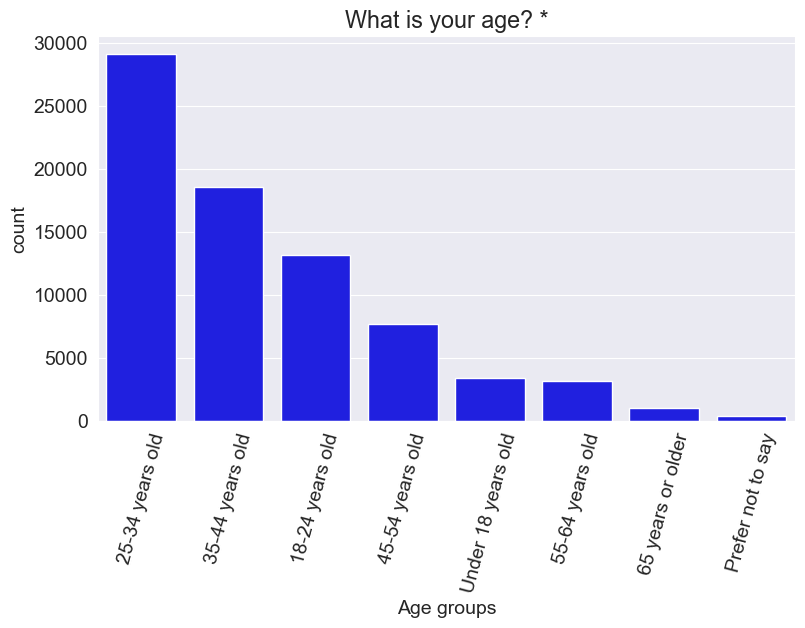

In [237]:
sns.barplot(x=age_df.index,y=age_df,color='blue')
plt.xticks(rotation=75);
plt.xlabel("Age groups");
plt.title(schema_df.Age);

It appears that most of the programmers are undar 45. We need to realise that 40 years ago computar science was not a thing. 

# Country 

#### Let's check where do the respondents live.

In [238]:
schema_df.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [239]:
top_countries=survey_df.Country.value_counts().head(15)

In [240]:
top_countries

Country
United States of America                                16503
Germany                                                  6162
United Kingdom of Great Britain and Northern Ireland     5096
India                                                    4930
Canada                                                   3066
France                                                   2596
Netherlands                                              2035
Poland                                                   1838
Australia                                                1797
Italy                                                    1647
Brazil                                                   1614
Spain                                                    1609
Sweden                                                   1463
Switzerland                                               966
Russian Federation                                        845
Name: count, dtype: int64

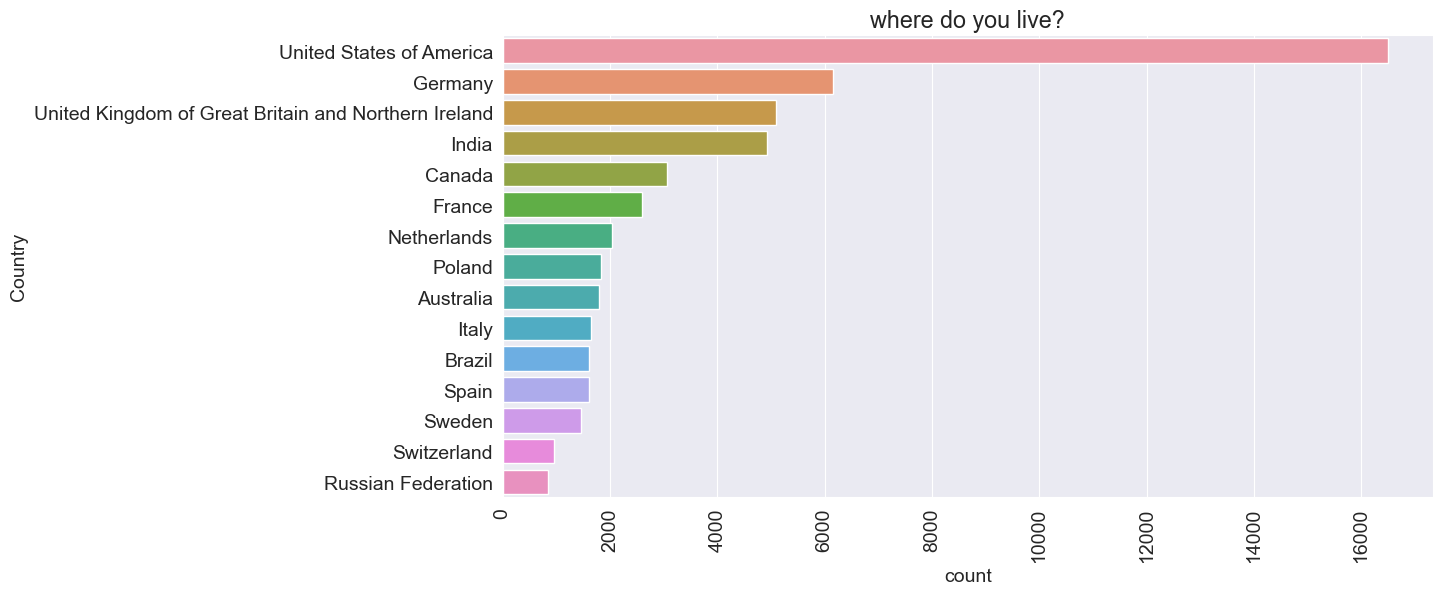

In [241]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("where do you live?")
sns.barplot(y=top_countries.index,x=top_countries);

Most of the respondents are from USA. It is surprising to see Germany in the second place because we need to realise that stack overflow platform is in english and Germany has less english speaking population conpared to UK and India.

### Years of coding experience

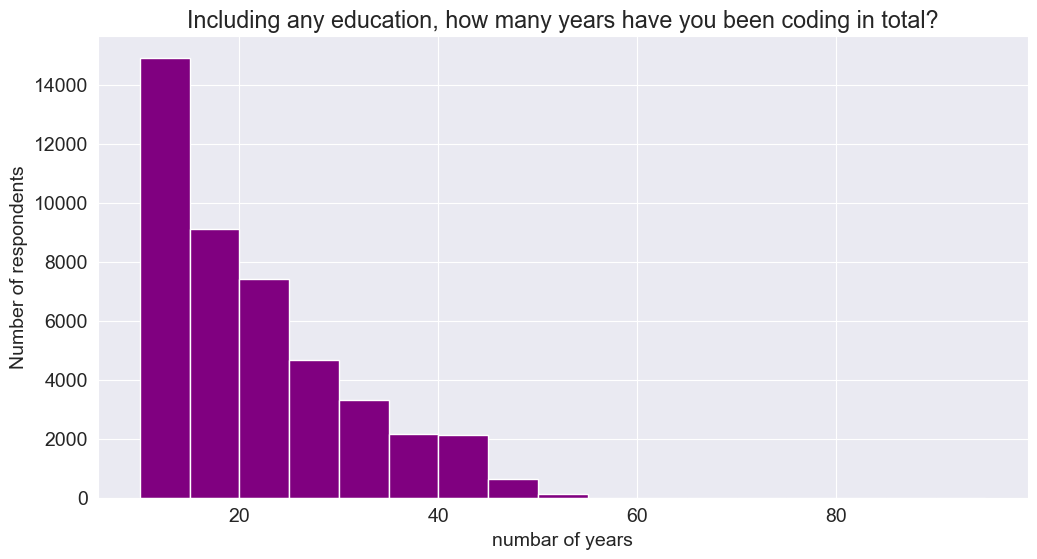

In [148]:
plt.figure(figsize=(12,6))
plt.title(schema_df.YearsCode)
plt.xlabel('numbar of years')
plt.ylabel('Number of respondents')

plt.hist(survey_df.YearsCode,bins=np.arange(10,100,5),color='purple');

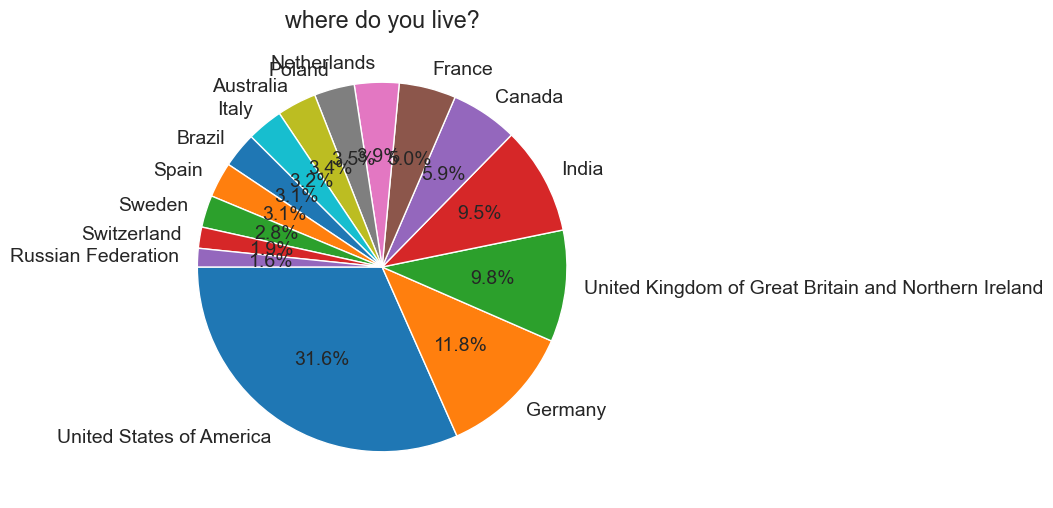

In [149]:
plt.figure(figsize=(12,6))
plt.title("where do you live?")
plt.pie(top_countries,labels=top_countries.index,autopct='%1.1f%%',startangle=180);

# Education

In [150]:
survey_df.EdLevel.unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

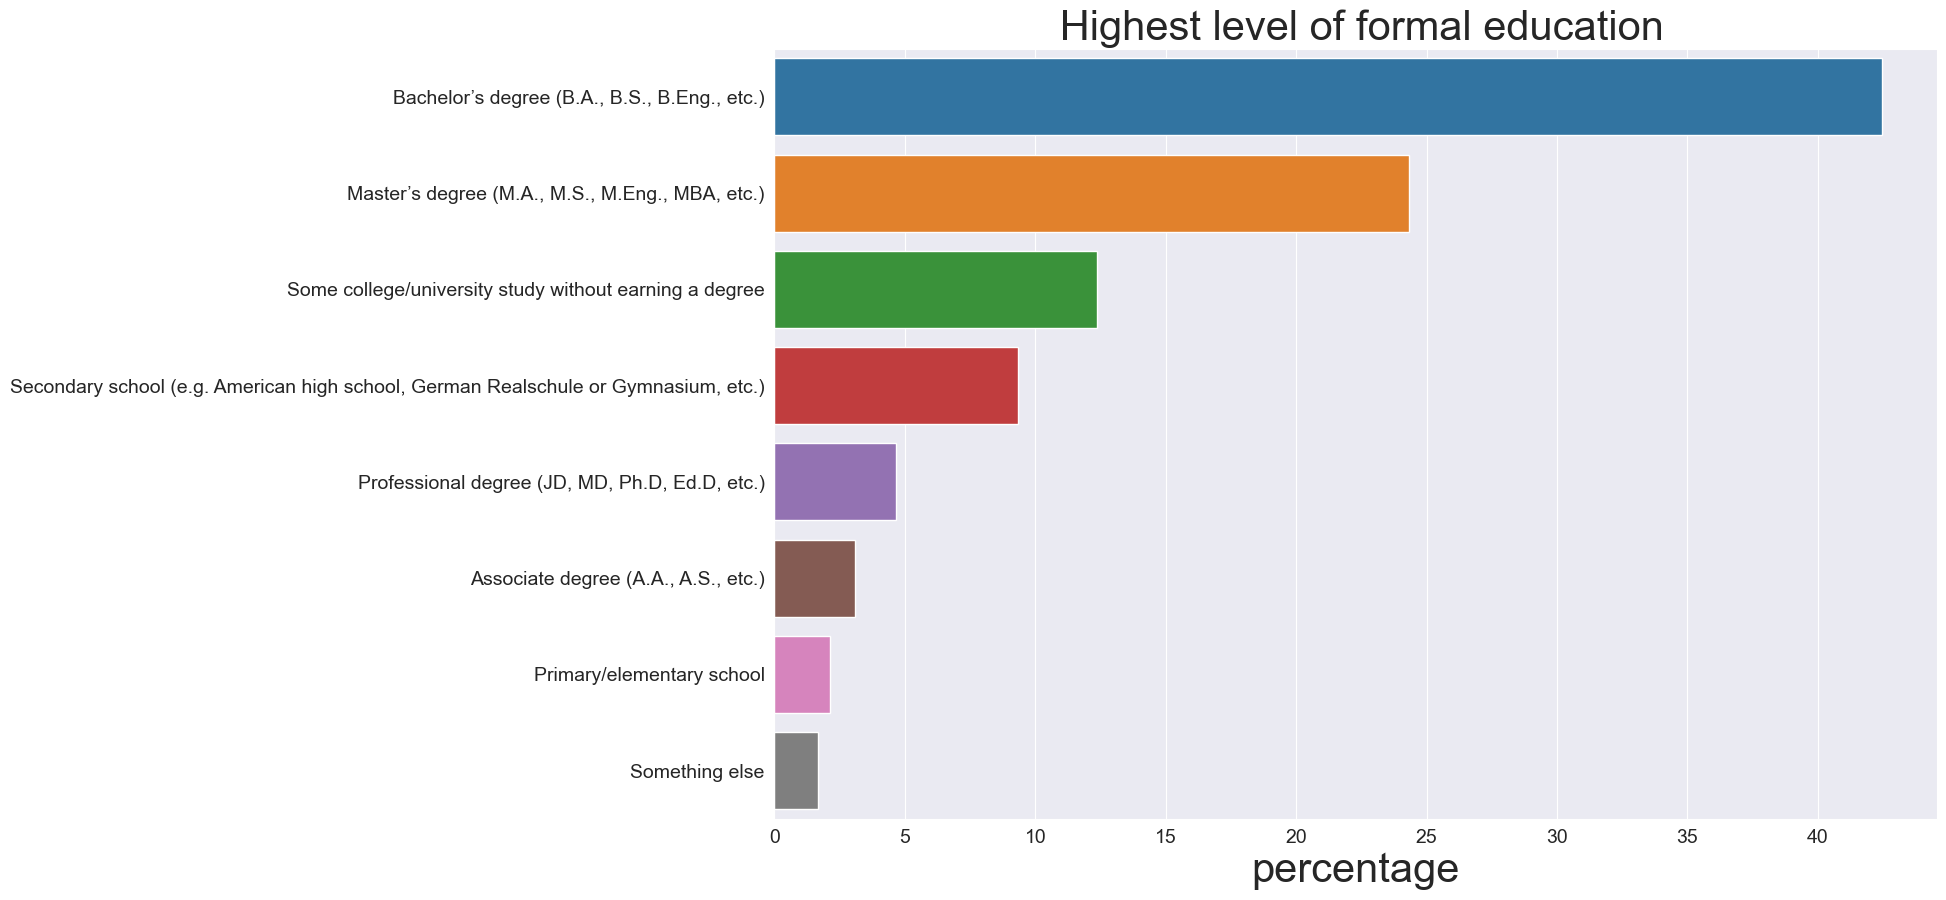

In [151]:
plt.figure(figsize=(15,10))
EdLevel_pct=survey_df.EdLevel.value_counts()*100/survey_df.EdLevel.count()
sns.barplot(x=EdLevel_pct,y=EdLevel_pct.index)
plt.title(' Highest level of formal education',fontsize=30)
plt.ylabel(None)
plt.xlabel('percentage',fontsize=30);

Most of the respondents have a Bachelor's or a Mastars degree but it is not clear in which field.

# Employment

#### Let's check the employment status of the respondents.

Text(0.5, 1.0, 'What industry is the company you work for in?')

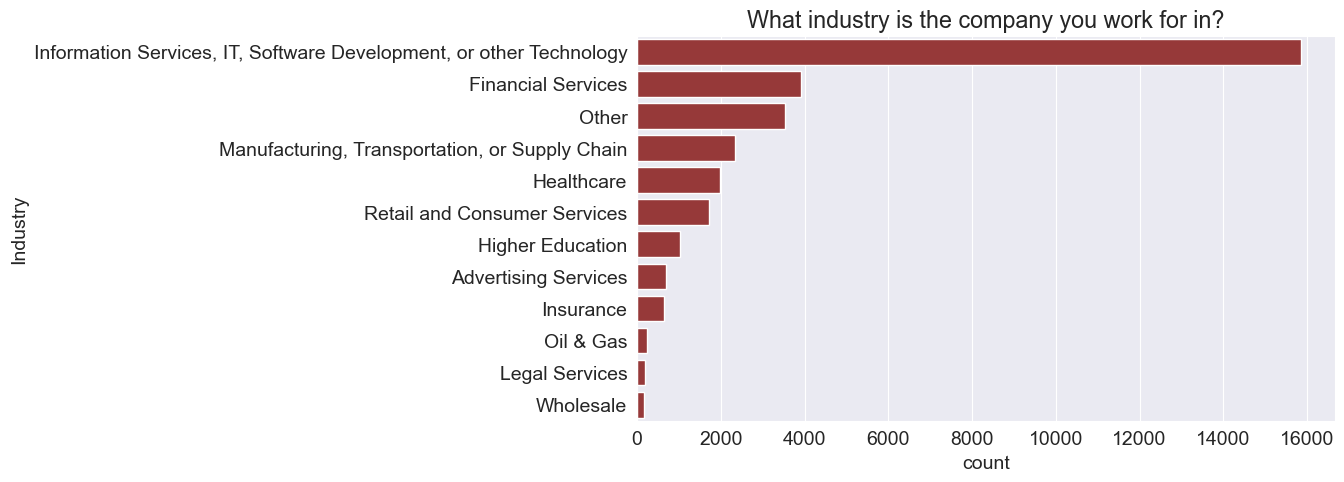

In [152]:
industry=survey_df.Industry.value_counts()
sns.barplot(x=industry,y=industry.index,color='brown');
plt.title(schema_df.Industry)

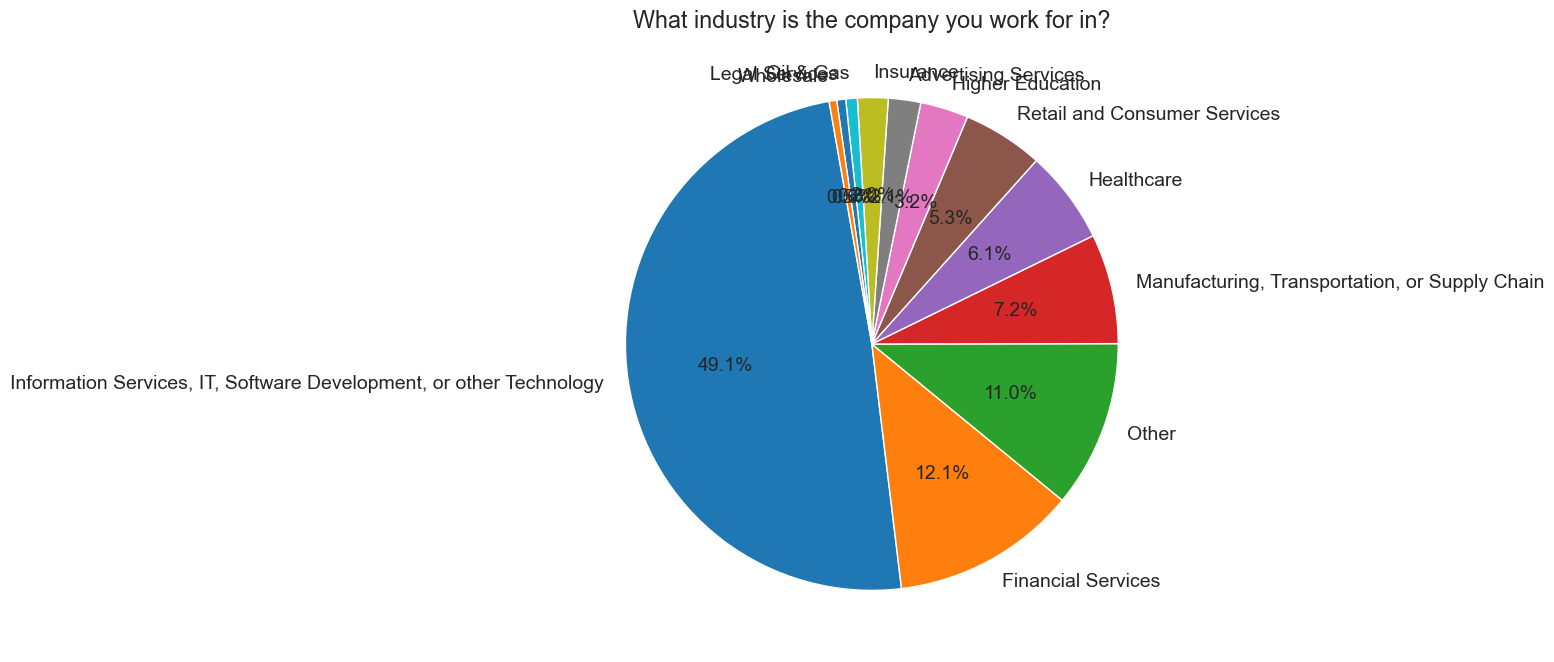

In [153]:
plt.figure(figsize=(8,8))
plt.title('What industry is the company you work for in?')
plt.pie(industry,labels=industry.index,autopct='%1.1f%%',startangle=100);

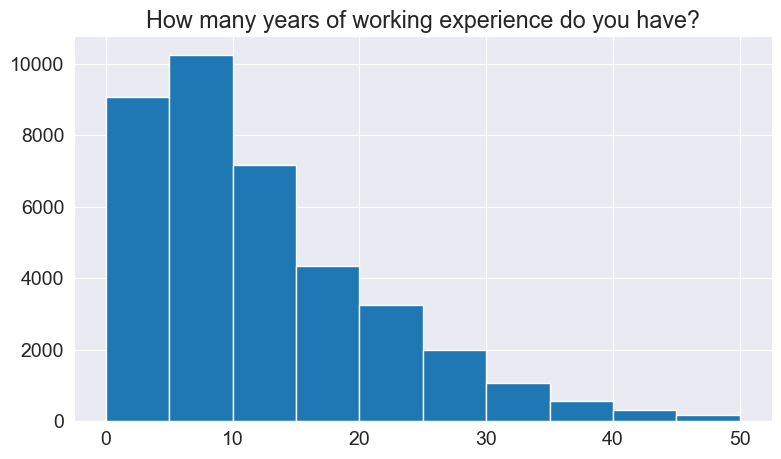

In [154]:
plt.hist(survey_df['WorkExp']);
plt.title(schema_df.WorkExp);

In [155]:
schema_df.Employment

'Which of the following best describes your current employment status? Select all that apply.'

In [156]:
survey_df.Employment.unique()

array([nan, 'Employed, full-time', 'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time', 'Employed, part-time', 'I prefer not to say',
       'Retired', 'Not employed, and not looking for work',
       'Student, part-time'], dtype=object)

In [157]:
Employment_df=survey_df.Employment.value_counts()

In [158]:
Employment_df

Employment
Employed, full-time                                     53748
Student, full-time                                       7430
Independent contractor, freelancer, or self-employed     7076
Not employed, but looking for work                       2553
Employed, part-time                                      1644
Not employed, and not looking for work                    844
Student, part-time                                        751
Retired                                                   570
I prefer not to say                                       549
Name: count, dtype: int64

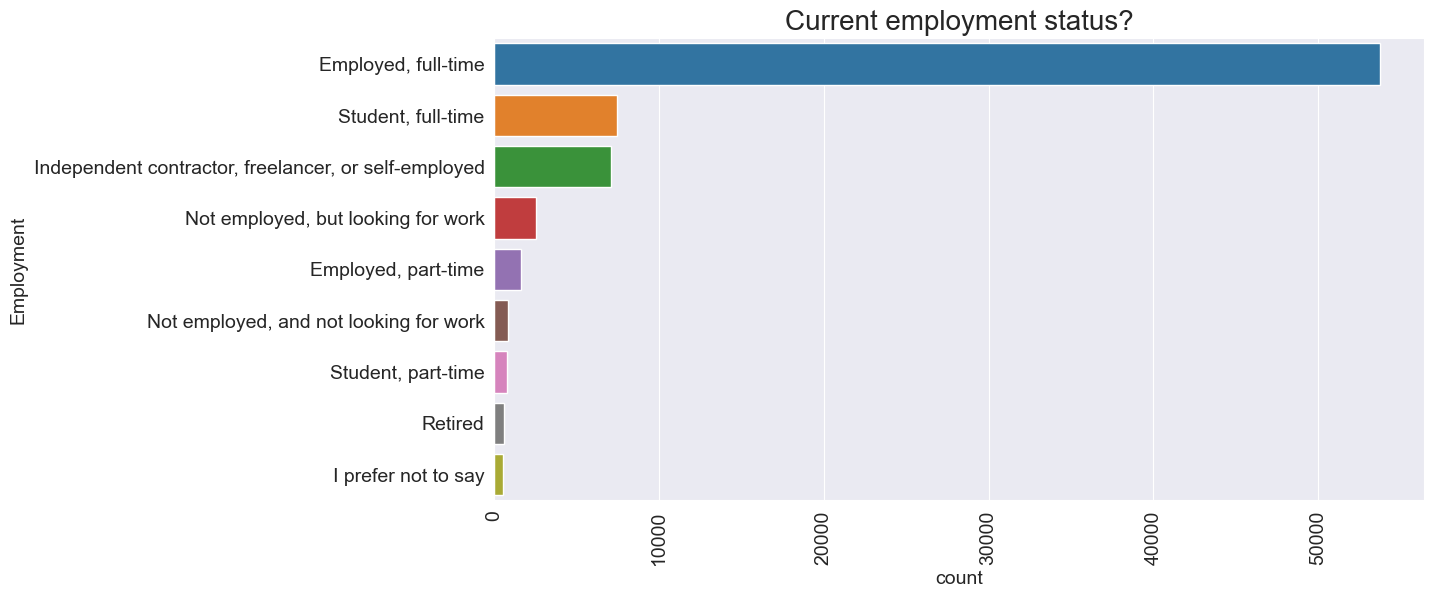

In [219]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Current employment status?',size=20)
sns.barplot(y=Employment_df.index,x=Employment_df);

It appears that most of the respondents are full time employees.

In [160]:
schema_df.DevType

'Which of the following describes your current job, the one you do most of the time? Please select only one.'

In [161]:
dev_type_total=survey_df.DevType.value_counts()

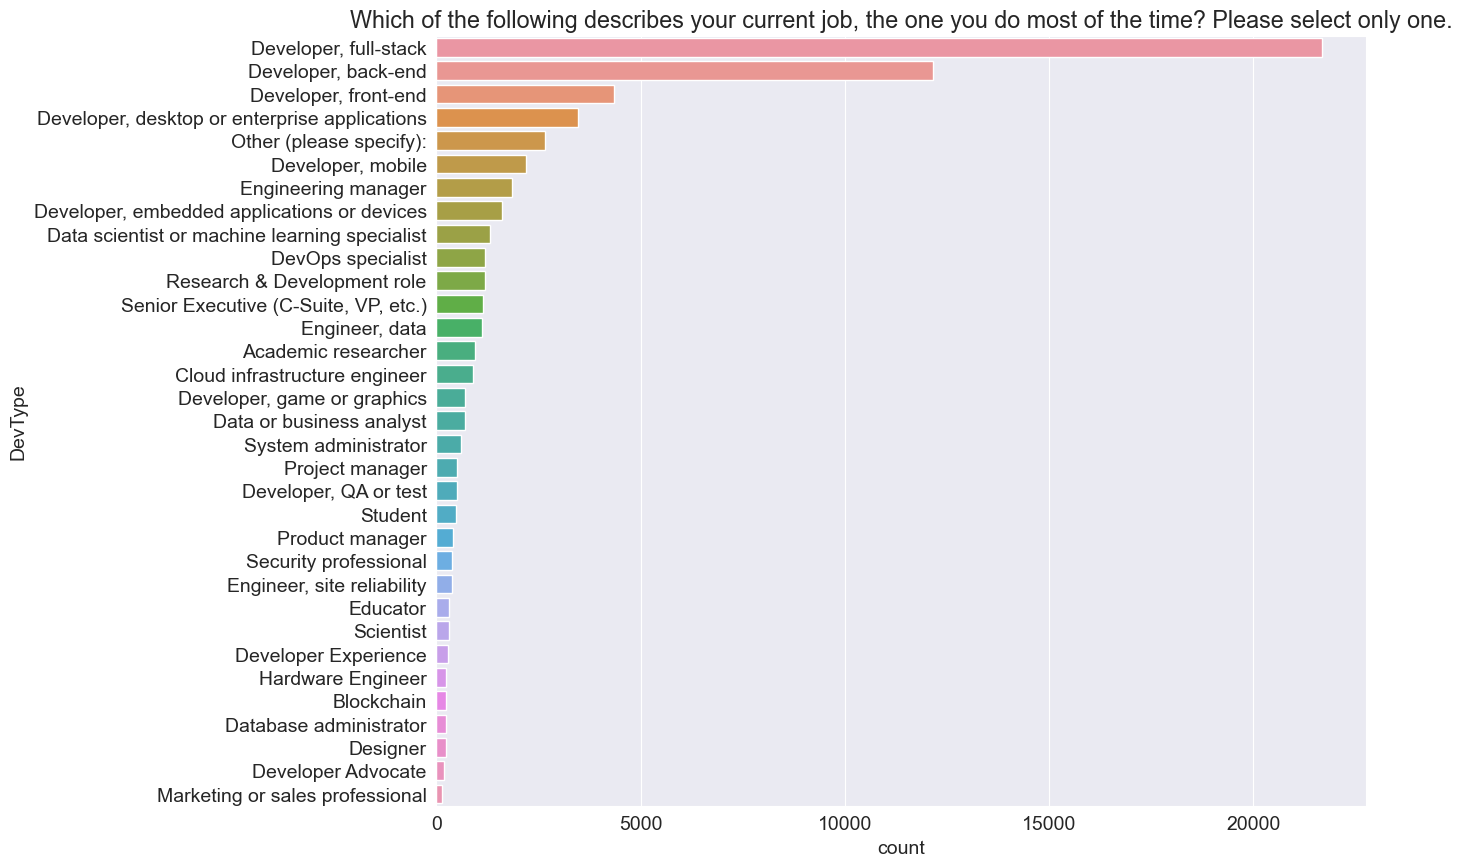

In [162]:
plt.figure(figsize=(12,10))
sns.barplot(y=dev_type_total.index,x=dev_type_total);
plt.title(schema_df.DevType);

A large numbar of respondents are involved in web development. Maybe web development is a very common skill among computar science graduates.

### Let's see what percentage of respondents work in roles related to data science?

In [163]:
dev_type_total['Data Science']=dev_type_total['Data scientist or machine learning specialist']+dev_type_total['Engineer, data']+dev_type_total['Data or business analyst']+dev_type_total['Database administrator']

In [164]:
indexes_to_drop = ['Data scientist or machine learning specialist', 'Engineer, data','Data or business analyst','Database administrator']  
dev_type_total.drop(index=indexes_to_drop, inplace=True)

In [165]:
dev_type_remaster=(dev_type_total/dev_type_total.sum()).sort_values(ascending=False)*100

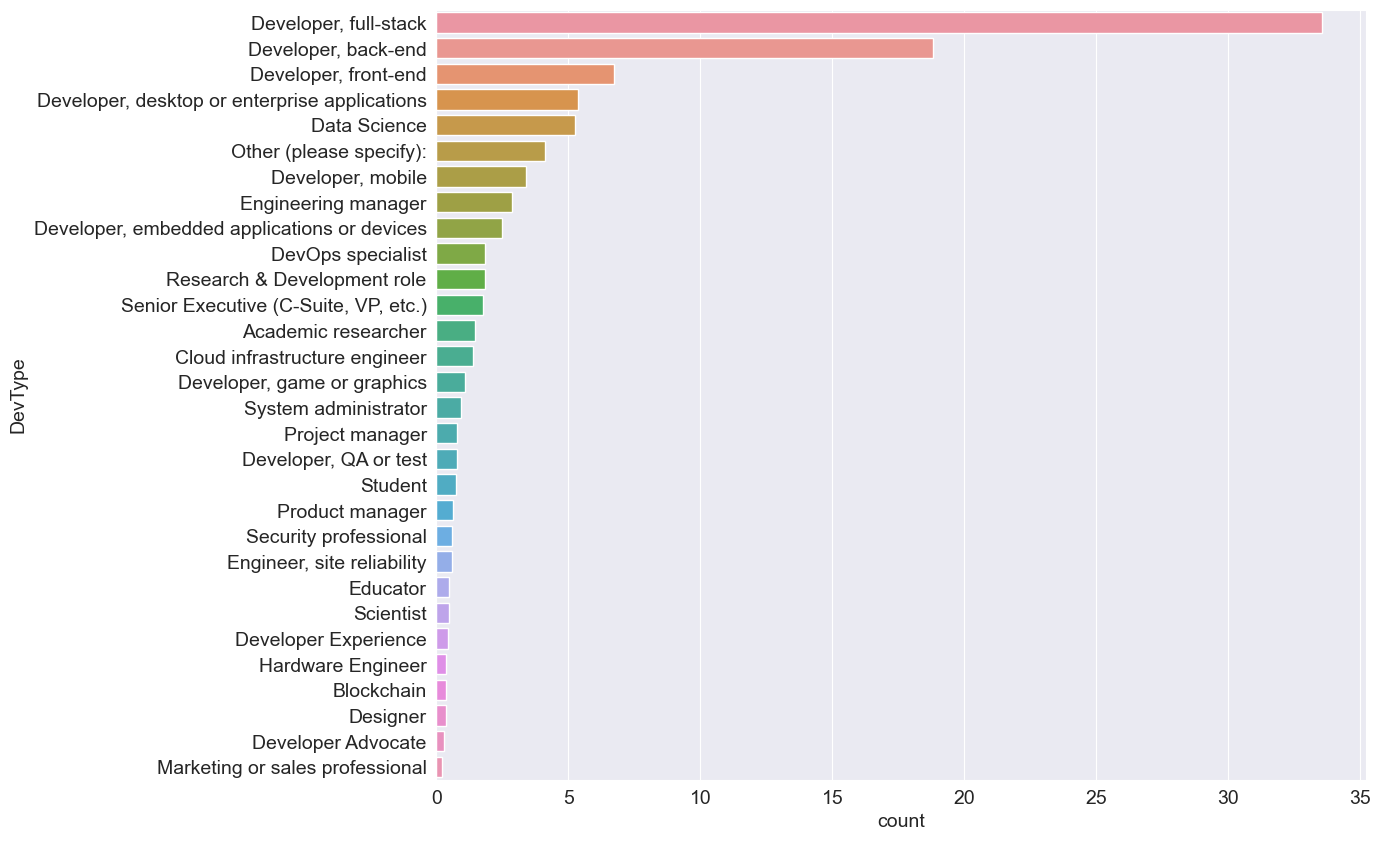

In [166]:
plt.figure(figsize=(12,10))
sns.barplot(y=dev_type_remaster.index,x=dev_type_remaster);

It appears that around 5% of respondents are working in data science related field

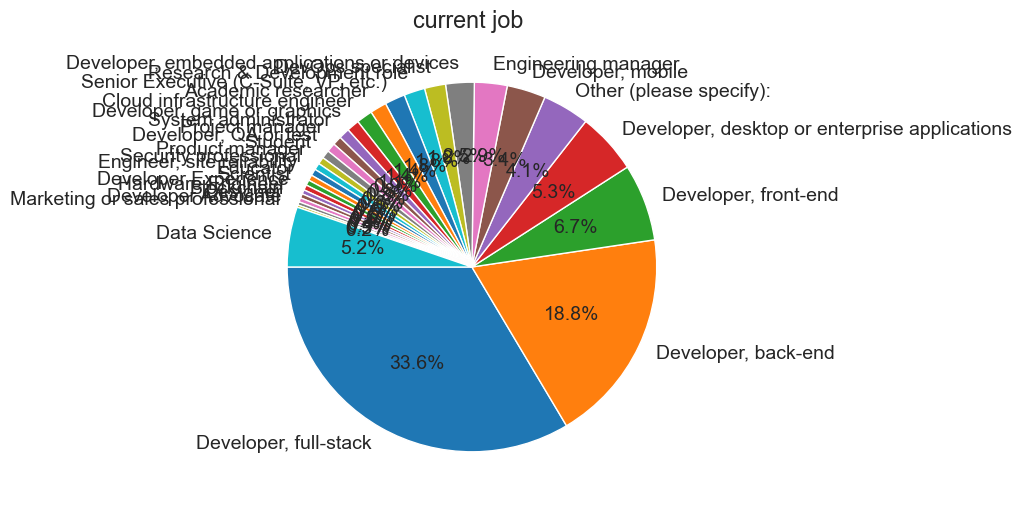

In [167]:
plt.figure(figsize=(12,6))
plt.title('current job ')
plt.pie(dev_type_total,labels=dev_type_total.index,autopct='%1.1f%%',startangle=180);

Only around 5% of respondents work in some field related to data science.

### Lets check which were the most popular programming languages in 2023?

In [168]:
survey_df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                                                                                            1325
Python                                                                                                                                                    1027
HTML/CSS;JavaScript                                                                                                                                        654
HTML/CSS;JavaScript;PHP;SQL                                                                                                                                611
C#                                                                                                                                                         610
                                                                                                                                                          ... 
Dart;Go;Python;Rust;SQL

In [169]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [170]:
languages_worked_df=split_multicolumn(survey_df['LanguageHaveWorkedWith'])

In [171]:
language_worked_percentages=languages_worked_df.mean().sort_values(ascending=False)*100
language_worked_percentages

JavaScript                 52.240312
HTML/CSS                   43.037989
SQL                        40.165276
Python                     40.052027
TypeScript                 31.714209
Bash/Shell (all shells)    26.616882
Java                       24.770138
C#                         22.849390
C++                        17.807006
C                          15.049785
PHP                        14.646125
PowerShell                 11.213895
Go                         10.881997
Rust                       10.260809
Kotlin                      7.275969
Ruby                        5.227395
Lua                         4.777763
Dart                        4.579297
Assembly                    4.096026
Swift                       3.751794
Visual Basic (.Net)         3.363832
R                           3.224794
VBA                         2.981476
Groovy                      2.915321
MATLAB                      2.806557
Delphi                      2.806557
Scala                       2.331136
P

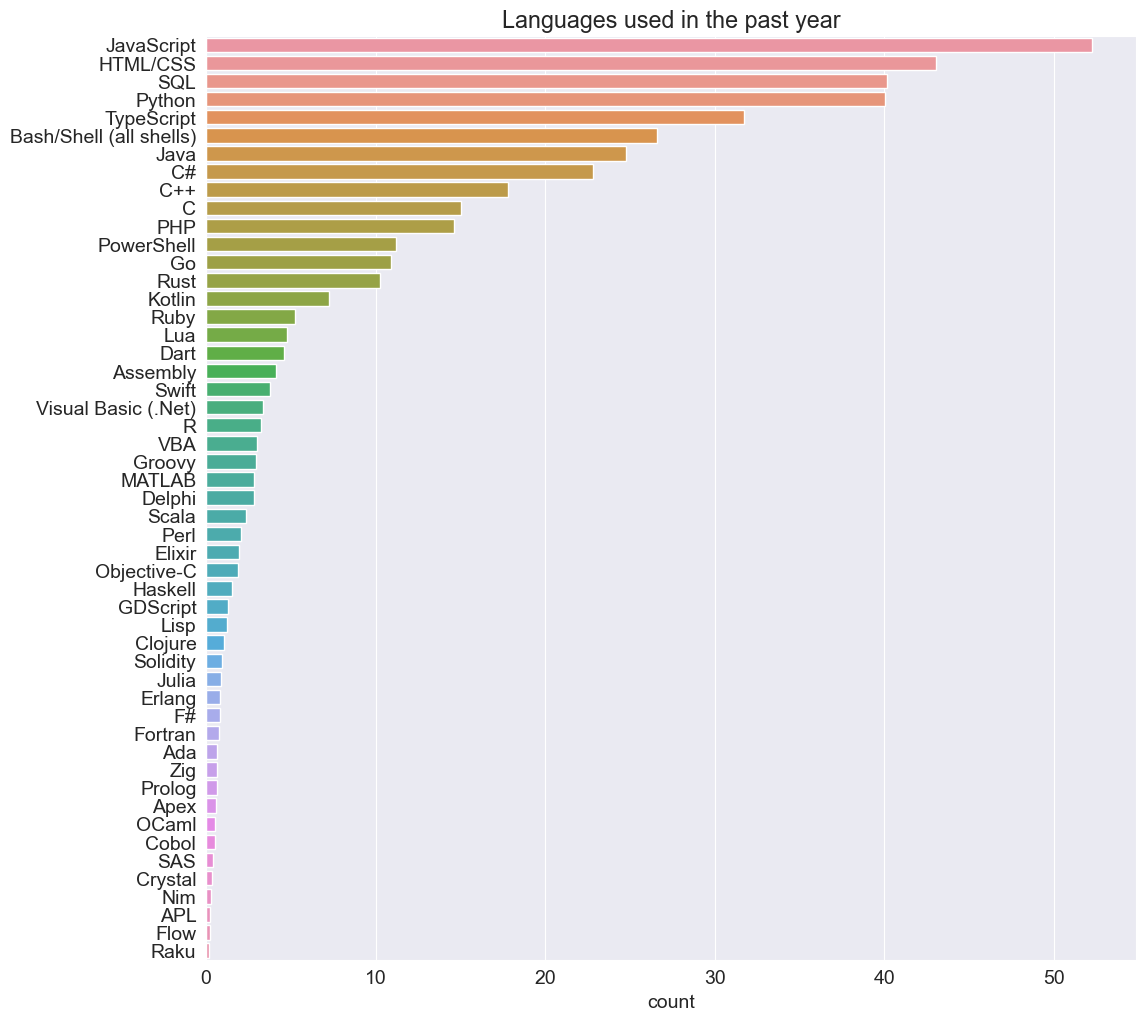

In [172]:
plt.figure(figsize=(12,12))
sns.barplot(x=language_worked_percentages,y=language_worked_percentages.index);
plt.title("Languages used in the past year");
plt.xlabel('count');

JavaScript and HTML/CSS have toped the list which is expected, seeing that Full-stack is the most popular profession.  

### lets check which languages are the most people interested to learn over the next year?

In [173]:
language_interested_df=split_multicolumn(survey_df['LanguageWantToWorkWith'])
language_interested_percentages=language_interested_df.mean().sort_values(ascending=False)*100
language_interested_percentages

JavaScript                 32.637020
Python                     32.388097
TypeScript                 29.855131
SQL                        27.678732
HTML/CSS                   27.544178
Rust                       24.697255
C#                         17.613025
Bash/Shell (all shells)    16.943622
Go                         16.700305
Java                       13.454207
C++                        12.920479
Kotlin                      9.681109
C                           8.966855
PHP                         7.200843
PowerShell                  5.809338
Dart                        5.256548
Swift                       4.904467
Ruby                        4.011930
Lua                         3.656485
Elixir                      3.590330
Assembly                    3.324587
Zig                         3.262917
Haskell                     2.948959
R                           2.752736
Scala                       2.611455
F#                          1.988025
Delphi                      1.934203
J

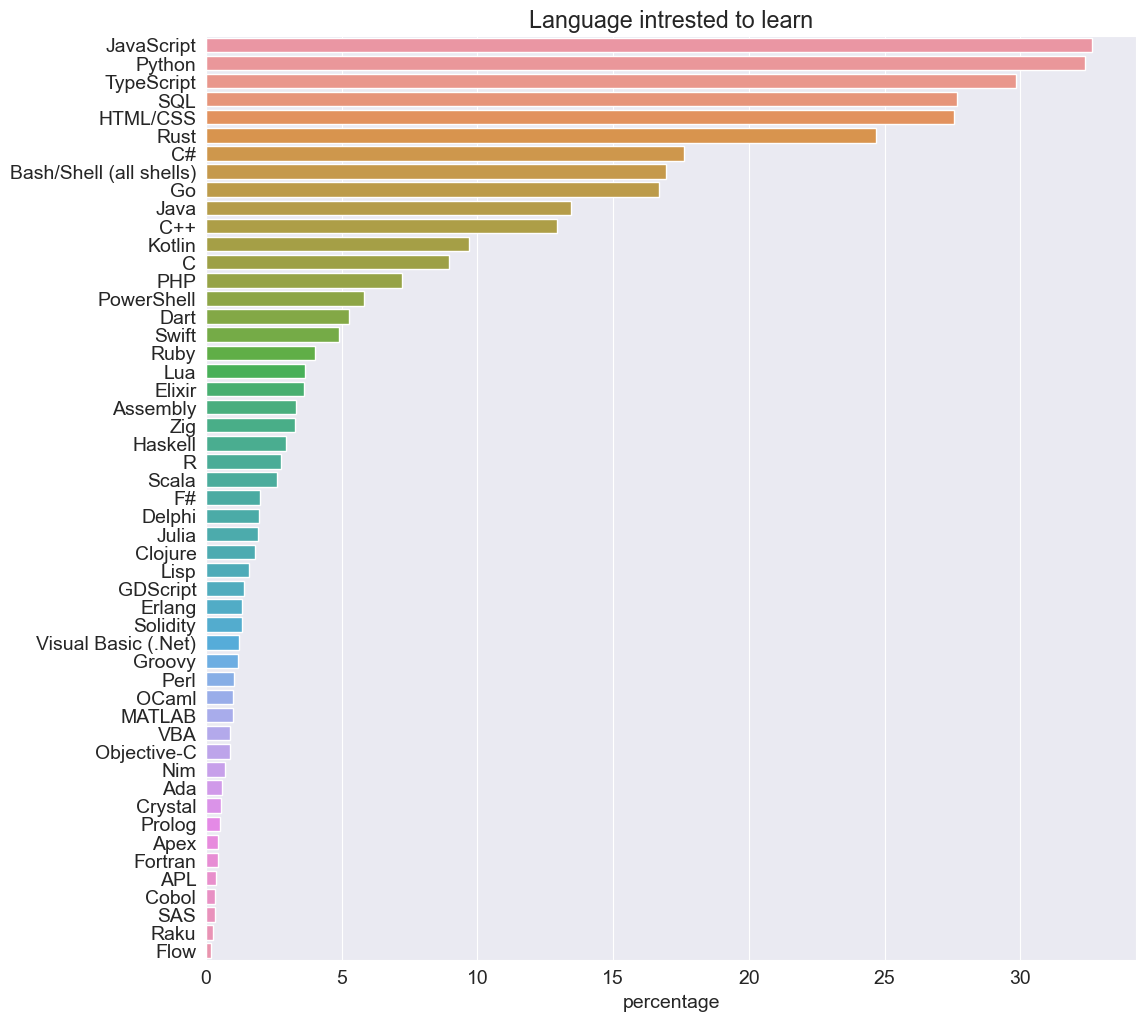

In [174]:
plt.figure(figsize=(12,12))
sns.barplot(x=language_interested_percentages,y=language_interested_percentages.index);
plt.title('Language intrested to learn')
plt.xlabel('percentage');

In [175]:
lang_learn_by_using=language_interested_df.sum()*100 /languages_worked_df.sum()
lang_learn_by_using=lang_learn_by_using.sort_values(ascending=False).head(20)
lang_learn_by_using

Zig         503.460208
Nim         249.803922
F#          248.667602
Rust        240.695006
Julia       213.081761
Haskell     191.272727
Elixir      187.032710
Raku        183.206107
OCaml       181.947262
APL         175.675676
Clojure     167.607106
Erlang      165.921788
Go          153.467285
Crystal     151.724138
Solidity    138.452521
Kotlin      133.055941
Swift       130.723252
Lisp        126.884650
Dart        114.789422
Scala       112.025012
dtype: float64

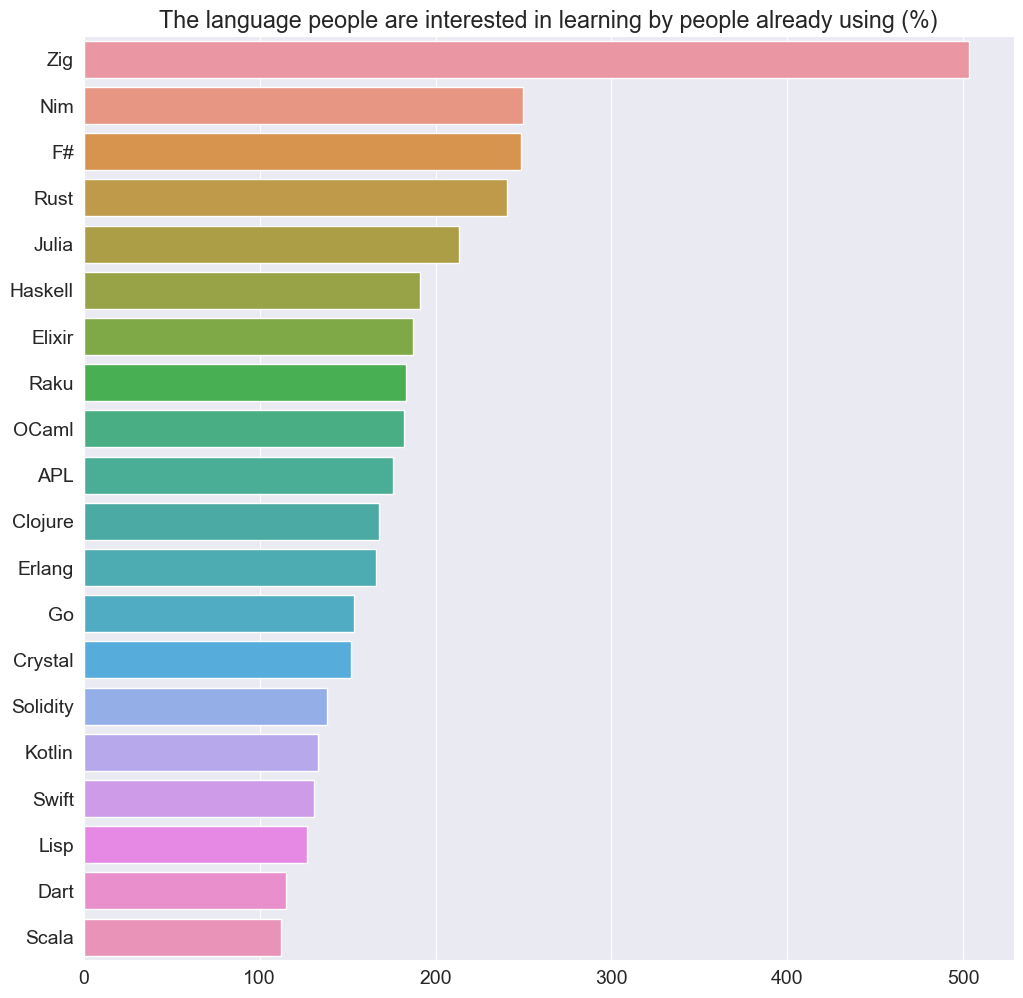

In [176]:
plt.figure(figsize=(12,12))
sns.barplot(x=lang_learn_by_using,y=lang_learn_by_using.index);
plt.title("The language people are interested in learning by people already using (%)");

The above graph gives the parcentage of people intrested in learning a language by people already using the language. We might expect a significant increase in numbar of programmers using the languages that are on the top. The graph shows only top 20 languages. 

### Lets findout which is the most loved programming language.

In [177]:
languages_loved_df=languages_worked_df & language_interested_df
language_loved_percentages=(languages_loved_df.sum()*100/languages_worked_df.sum()).sort_values(ascending=False)

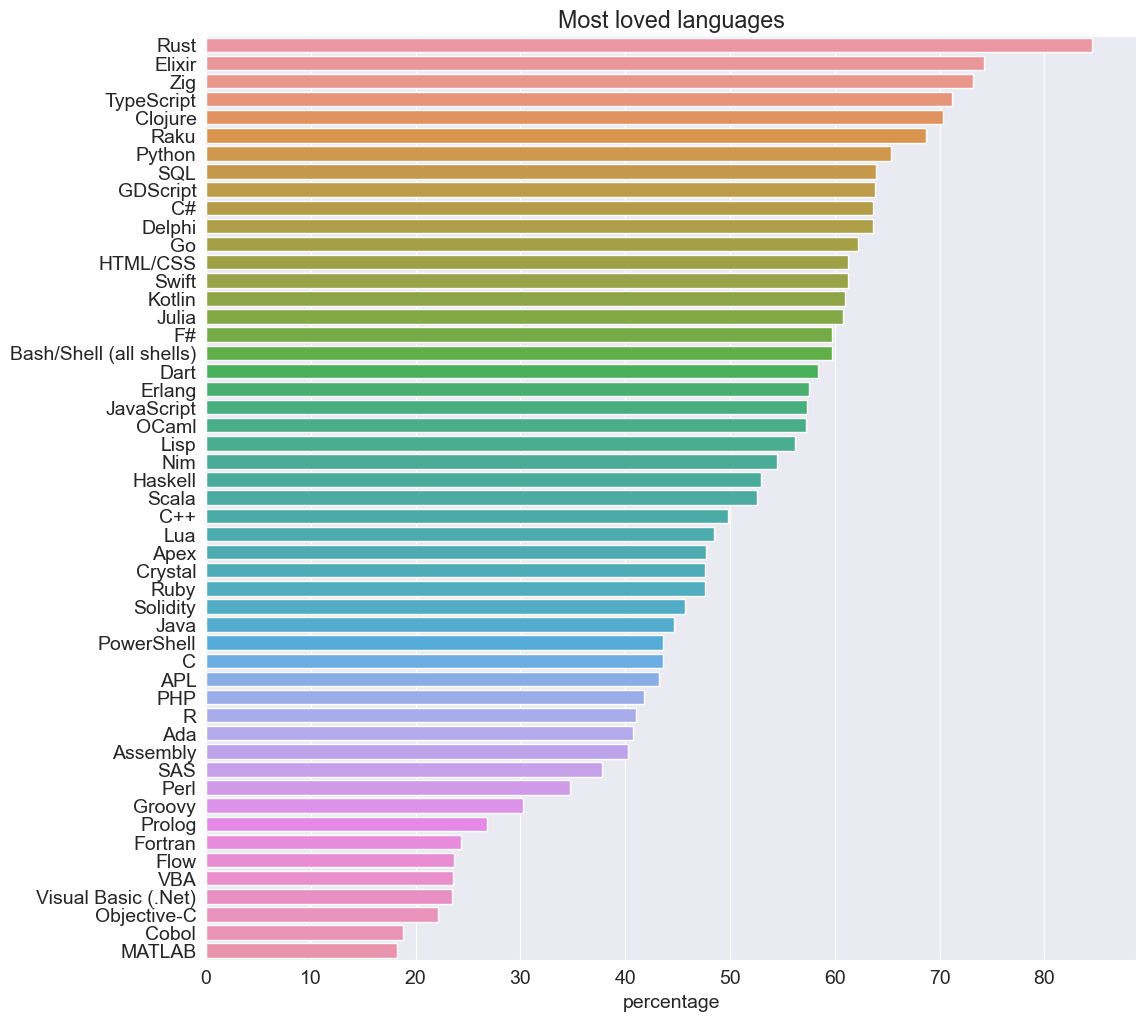

In [178]:
plt.figure(figsize=(12,12))
sns.barplot(x=language_loved_percentages,y=language_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('percentage');

A large number of programmers who are using a particular language want to continue using it over the next year. Based on this info we calculated the percentage of people loving the particular language and ploted the above graph. It seems like Rust is the most loved language.

### Let's findout which is the popular language among people working in data science related field

In [179]:
survey_df.DevType.unique()

array([nan, 'Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional', 'Educator',
       'Research & Development role', 'Other (please specify):',
       'Developer, mobile', 'Database administrator',
       'Developer, embedded applications or devices', 'Engineer, data',
       'Hardware Engineer', 'Product manager', 'Academic researcher',
       'Developer, game or graphics', 'Cloud infrastructure engineer',
       'Student', 'Developer Experience', 'Project manager',
       'DevOps specialist', 'Engineering manager',
       'Engineer, site reliability', 'Blockchain', 'Developer Advocate',
       'Scientist', 'Marketing or sales professional'], dtype=object)

In [180]:
list=['Data scientist or machine learning specialist','Data or business analyst','Database administrator','Engineer, data']

In [181]:
People_data_field=survey_df[survey_df.DevType.isin(list)]

In [182]:
languages_worked_bydata=split_multicolumn(People_data_field['LanguageHaveWorkedWith'])
languages_worked_bydatapct=languages_worked_bydata.mean().sort_values(ascending=False).head(20)*100

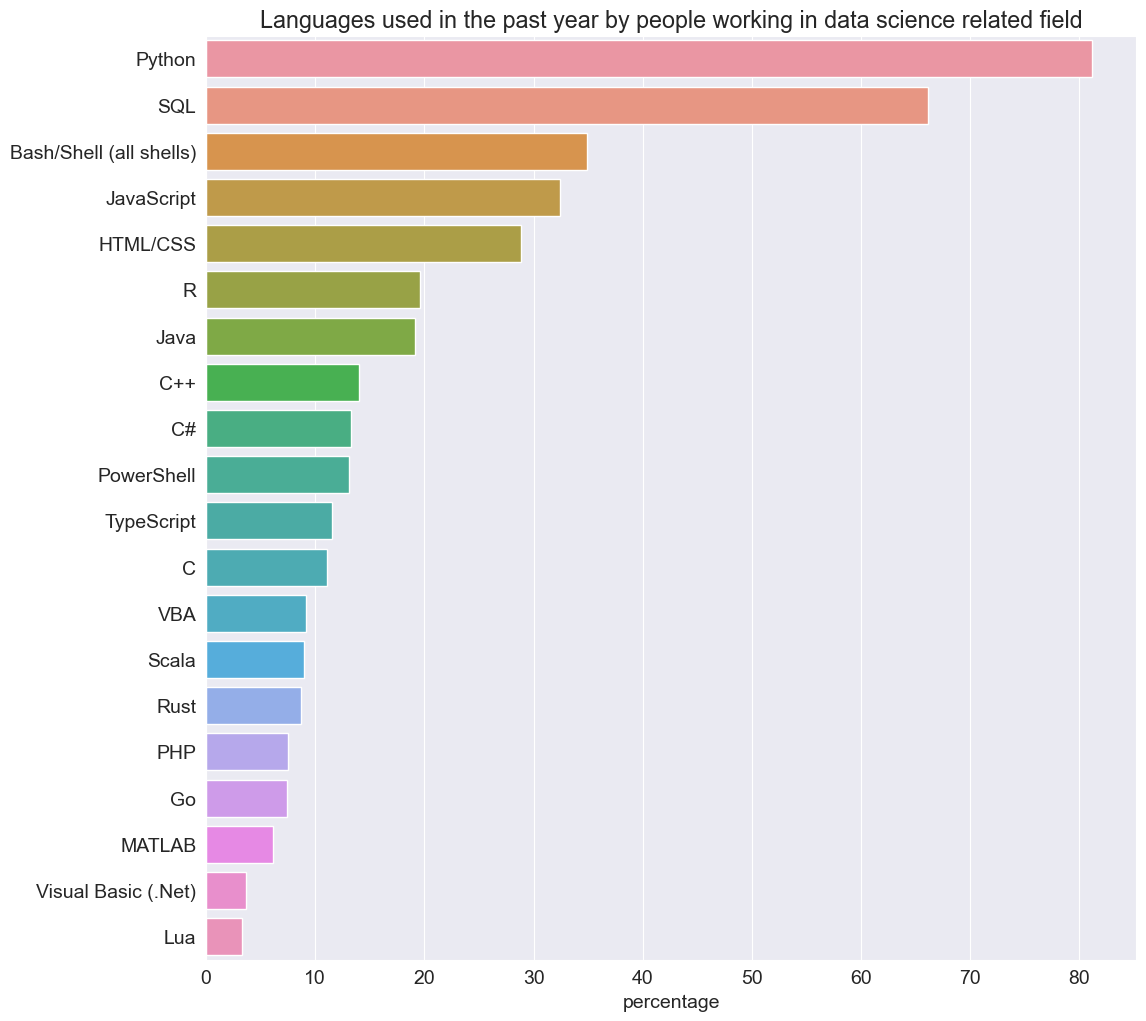

In [183]:
plt.figure(figsize=(12,12))
sns.barplot(x=languages_worked_bydatapct,y=languages_worked_bydatapct.index);
plt.title("Languages used in the past year by people working in data science related field");
plt.xlabel('percentage');

The above graph shows only the top 20 languages used in data science related field. This is the graph i am most intrested in.

### Lets see which is the most popular cloud service

In [184]:
survey_df['PlatformHaveWorkedWith'].value_counts()

PlatformHaveWorkedWith
Amazon Web Services (AWS)                                                                                                                            8912
Microsoft Azure                                                                                                                                      5410
Google Cloud                                                                                                                                         2195
Amazon Web Services (AWS);Microsoft Azure                                                                                                            1946
Amazon Web Services (AWS);Google Cloud                                                                                                               1625
                                                                                                                                                     ... 
Amazon Web Services (AWS);Cloudflare;Digital Ocean;Fi

In [185]:
Plotform_worked_df=split_multicolumn(survey_df['PlatformHaveWorkedWith'])

In [186]:
Platform_worked_pct=Plotform_worked_df.mean().sort_values(ascending=False).head(15)*100
Platform_worked_pct

Amazon Web Services (AWS)    32.477799
Microsoft Azure              17.415680
Google Cloud                 15.342438
Firebase                      9.479279
Cloudflare                    9.377243
Digital Ocean                 8.248116
Heroku                        7.401552
Vercel                        6.408100
Netlify                       5.435953
VMware                        4.535567
Hetzner                       2.651821
Linode, now Akamai            2.429808
Managed Hosting               2.086697
OVH                           2.074363
OpenShift                     1.658369
dtype: float64

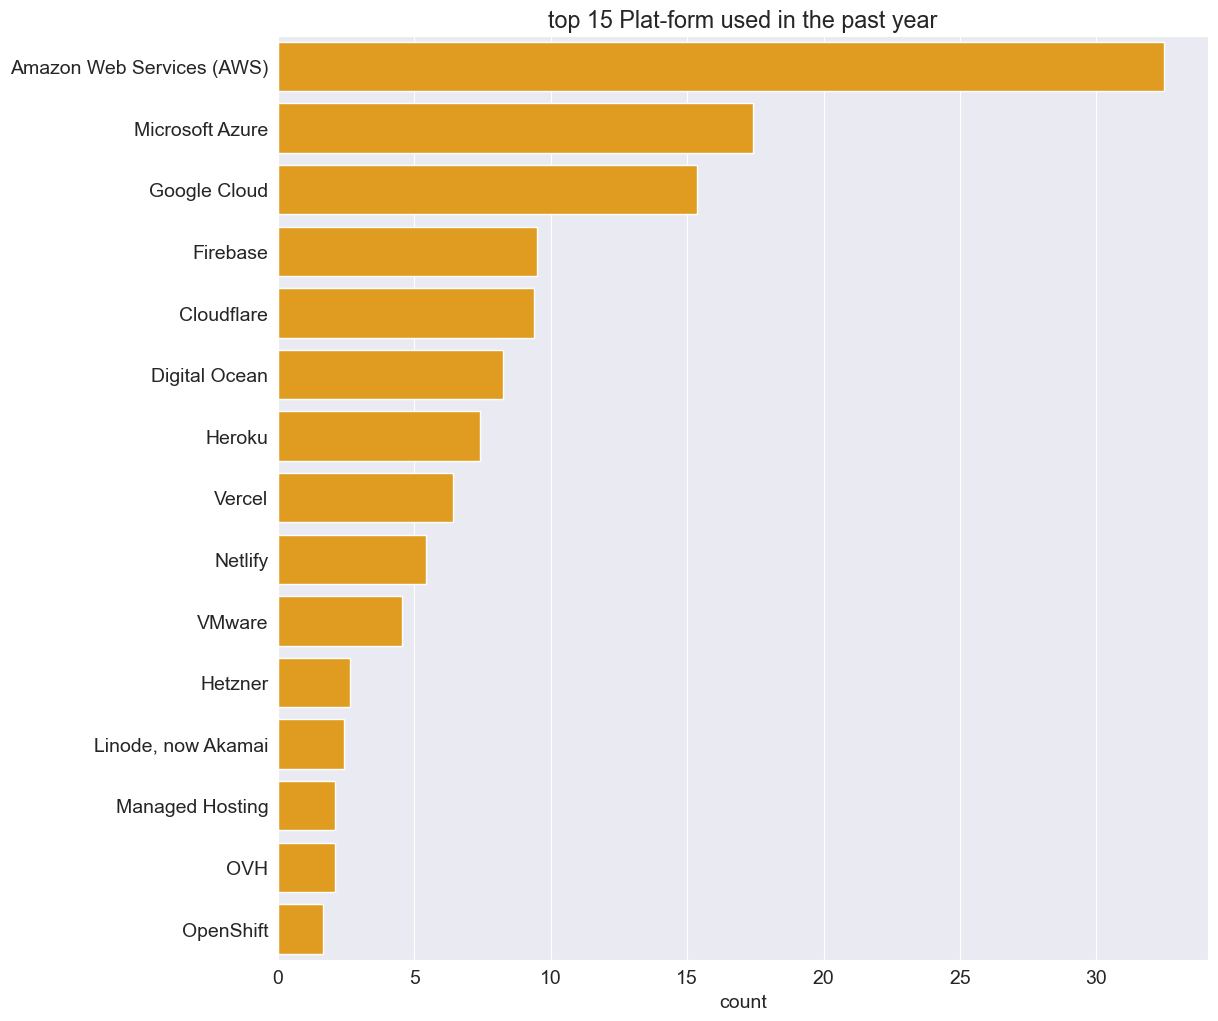

In [187]:
plt.figure(figsize=(12,12))
sns.barplot(x=Platform_worked_pct,y=Platform_worked_pct.index,color='orange');
plt.title("top 15 Plat-form used in the past year");
plt.xlabel('count');

### lets findout which is the most loved platform just like we founf to programming language

In [188]:
platform_intrested_df=split_multicolumn(survey_df['PlatformWantToWorkWith'])
platform_loved_df=platform_intrested_df&Plotform_worked_df

In [189]:
Platform_loved_pct=platform_loved_df.mean().sort_values(ascending=False).head(15)*100

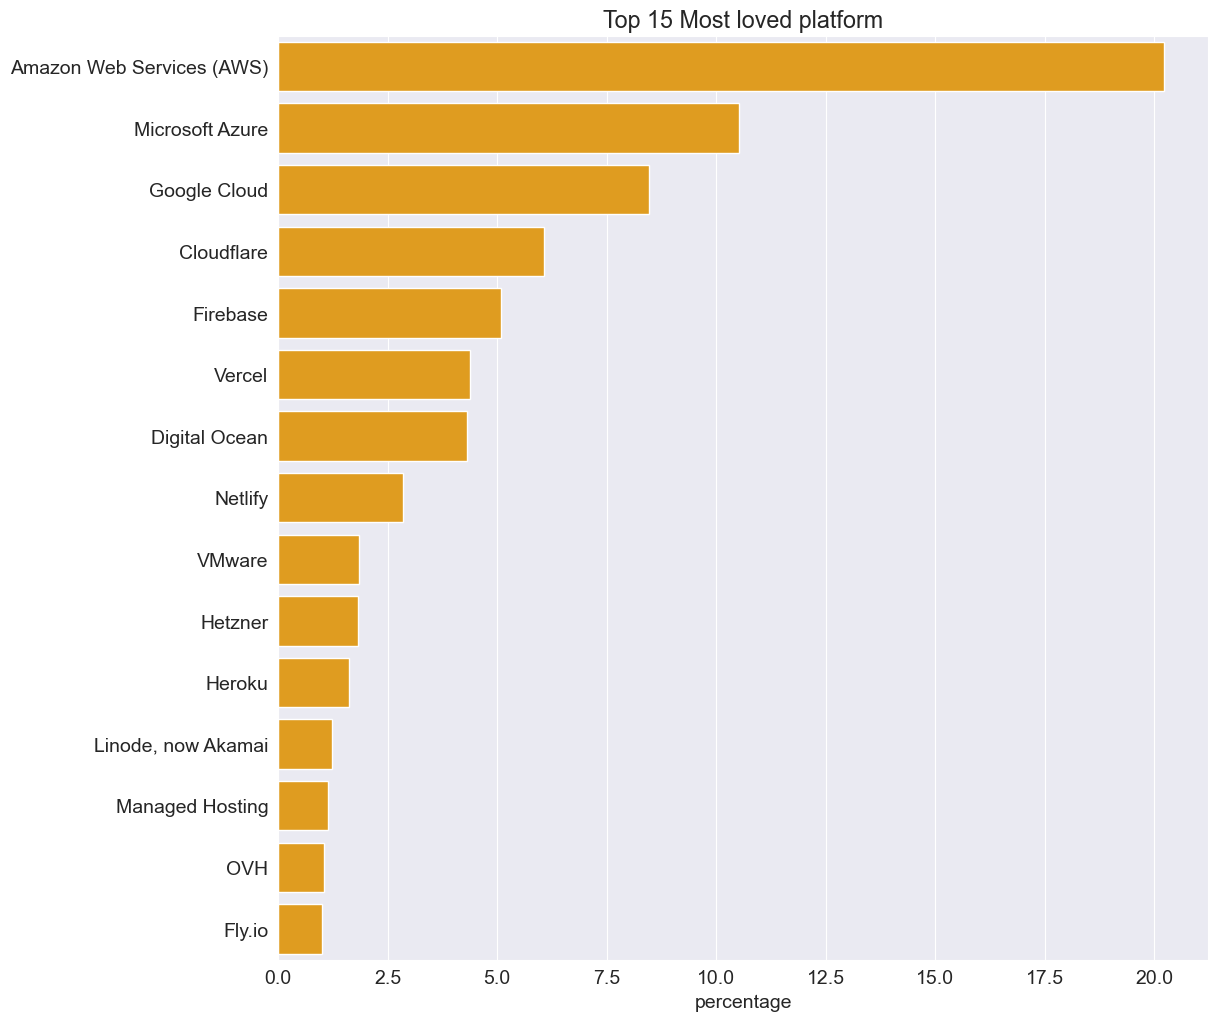

In [190]:
plt.figure(figsize=(12,12))
sns.barplot(x=Platform_loved_pct,y=Platform_loved_pct.index,color='orange');
plt.title("Top 15 Most loved platform");
plt.xlabel('percentage');

### Lets find out which is the most popular database used by people in data science related fields

In [191]:
People_data_field['DatabaseHaveWorkedWith'].value_counts()

DatabaseHaveWorkedWith
Microsoft SQL Server                                                  173
PostgreSQL                                                            156
MySQL                                                                  65
PostgreSQL;SQLite                                                      62
Oracle                                                                 60
                                                                     ... 
Cosmos DB;Microsoft SQL Server;SQLite                                   1
MongoDB;PostgreSQL;Redis;Snowflake;SQLite                               1
InfluxDB;Microsoft Access;Microsoft SQL Server;MySQL;Oracle;SQLite      1
Snowflake;Solr                                                          1
Cassandra;PostgreSQL;Snowflake                                          1
Name: count, Length: 1145, dtype: int64

In [192]:
database_worked_df=split_multicolumn(People_data_field['DatabaseHaveWorkedWith'])

In [193]:
database_worked_df

,MariaDB,PostgreSQL,SQLite,Microsoft Access,Microsoft SQL Server,MySQL,BigQuery,MongoDB,Snowflake,Cassandra,...,Firebird,Solr,InfluxDB,Couchbase,Cockroachdb,Supabase,Couch DB,RavenDB,TiDB,Datomic
21,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,True,True,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89057,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
89068,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
89153,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
89161,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [194]:
database_worked_pct=database_worked_df.mean().sort_values(ascending=False).head(20)*100

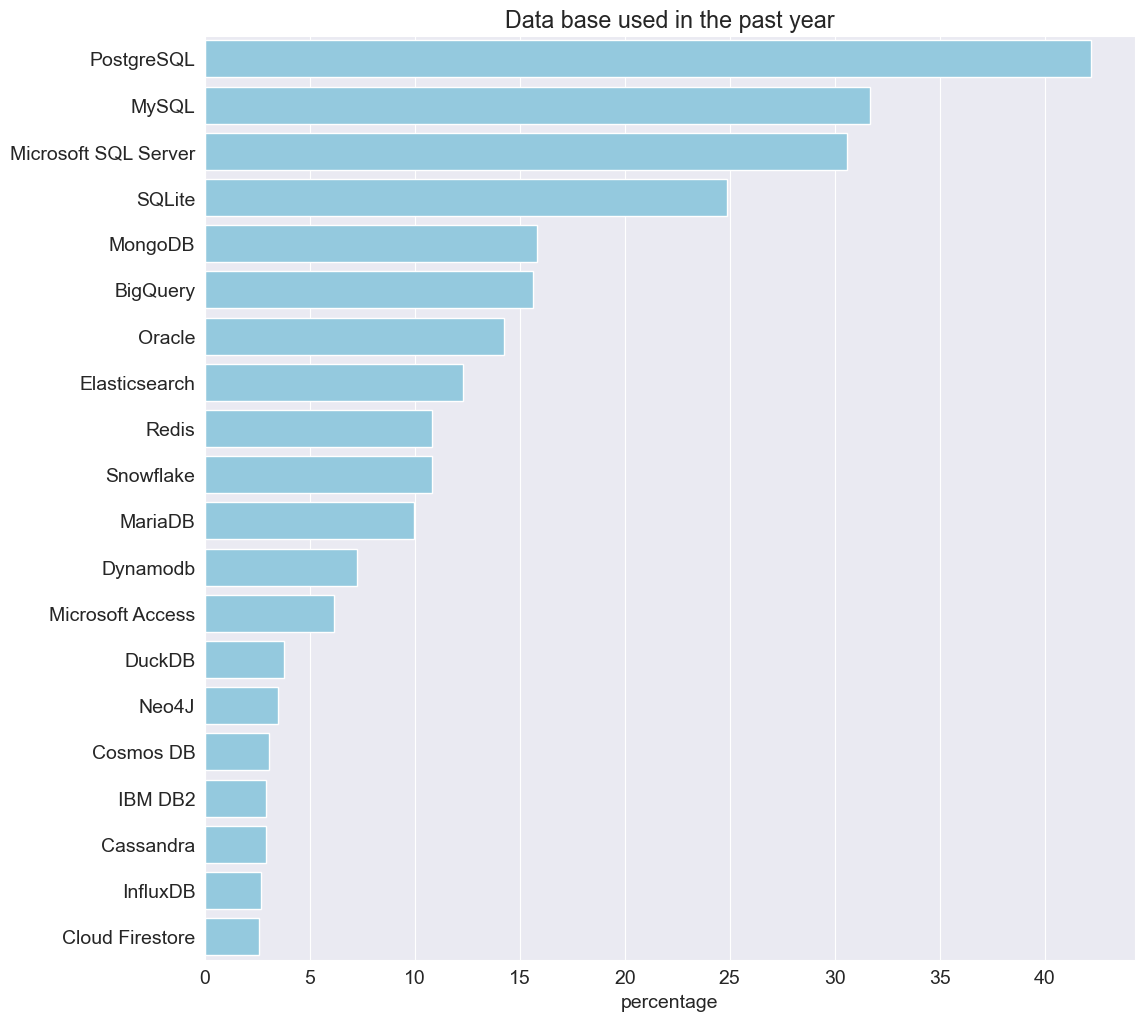

In [195]:
plt.figure(figsize=(12,12))
sns.barplot(x=database_worked_pct,y=database_worked_pct.index,color='skyblue');
plt.title("Data base used in the past year");
plt.xlabel('percentage');

### Let's find out which is the most used developar environment

In [196]:
survey_df.NEWCollabToolsHaveWorkedWith.value_counts()

NEWCollabToolsHaveWorkedWith
Visual Studio Code                                                                                                        7700
Visual Studio;Visual Studio Code                                                                                          3059
Notepad++;Visual Studio;Visual Studio Code                                                                                1981
IntelliJ IDEA;Visual Studio Code                                                                                          1488
Vim;Visual Studio Code                                                                                                    1403
                                                                                                                          ... 
IPython;Jupyter Notebook/JupyterLab;Notepad++;PyCharm;Visual Studio;Visual Studio Code;VSCodium                              1
Eclipse;Nano;PhpStorm;Sublime Text;Visual Studio Code                             

In [197]:
collabtool_worked_df=split_multicolumn(survey_df.NEWCollabToolsHaveWorkedWith)

In [198]:
collabtool_worked_pct=collabtool_worked_df.mean().sort_values(ascending=False).head(15)*100

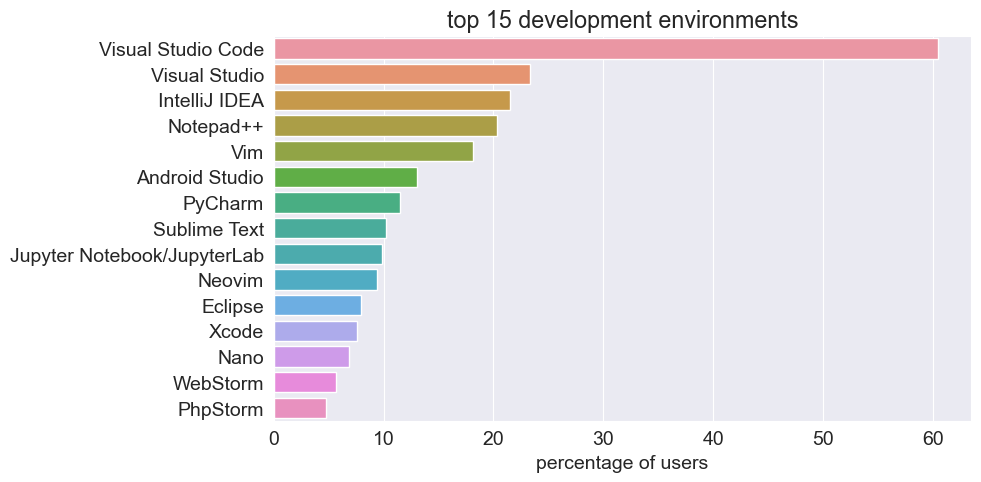

In [199]:
sns.barplot(y=collabtool_worked_pct.index,x=collabtool_worked_pct);
plt.title('top 15 development environments');
plt.xlabel('percentage of users');

In [200]:
collabtool_want_towork_df=split_multicolumn(survey_df.NEWCollabToolsWantToWorkWith)

In [201]:
collabtool_want_towork_pct=collabtool_want_towork_df.mean().sort_values(ascending=False).head(15)*100

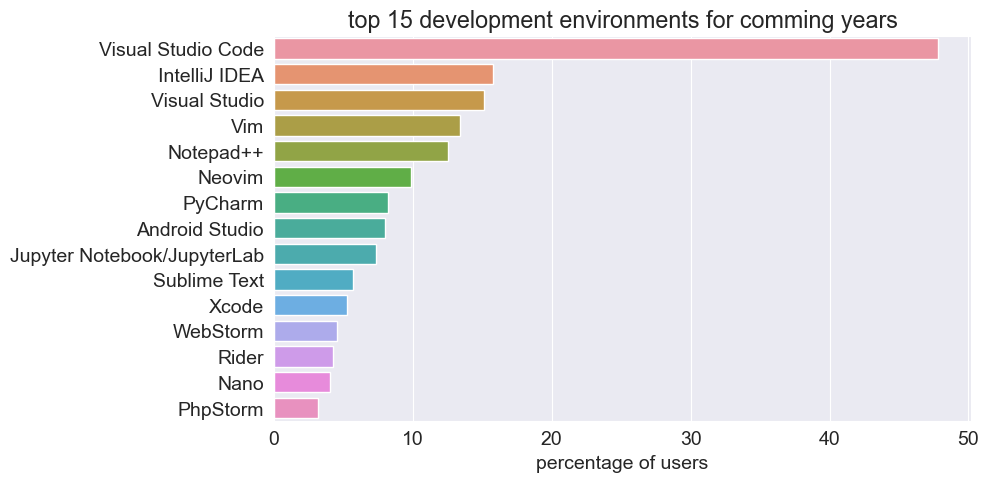

In [202]:
sns.barplot(y=collabtool_want_towork_pct.index,x=collabtool_want_towork_pct);
plt.title('top 15 development environments for comming years');
plt.xlabel('percentage of users');

There isn't much changes in the above two graphs. VS Code seems very dominent in the field.

### Lets see which operating system is used in the industry.

In [203]:
survey_df['OpSysProfessional use'].value_counts()

OpSysProfessional use
Windows                                                                                                              13985
MacOS                                                                                                                11626
Ubuntu                                                                                                                4472
Windows;Windows Subsystem for Linux (WSL)                                                                             3340
Ubuntu;Windows                                                                                                        2302
                                                                                                                     ...  
Arch;Debian;Fedora;Other Linux-based;Ubuntu;Windows;Windows Subsystem for Linux (WSL)                                    1
AIX;Android;Arch;BSD;ChromeOS;Cygwin;Debian;Fedora;Haiku;Red Hat;Solaris;Ubuntu;Windows Subsystem for Linux (WSL)    

In [204]:
Op_use_df=split_multicolumn(survey_df['OpSysProfessional use'])

In [205]:
Op_use_pct=Op_use_df.mean().sort_values(ascending=False).head(15)*100

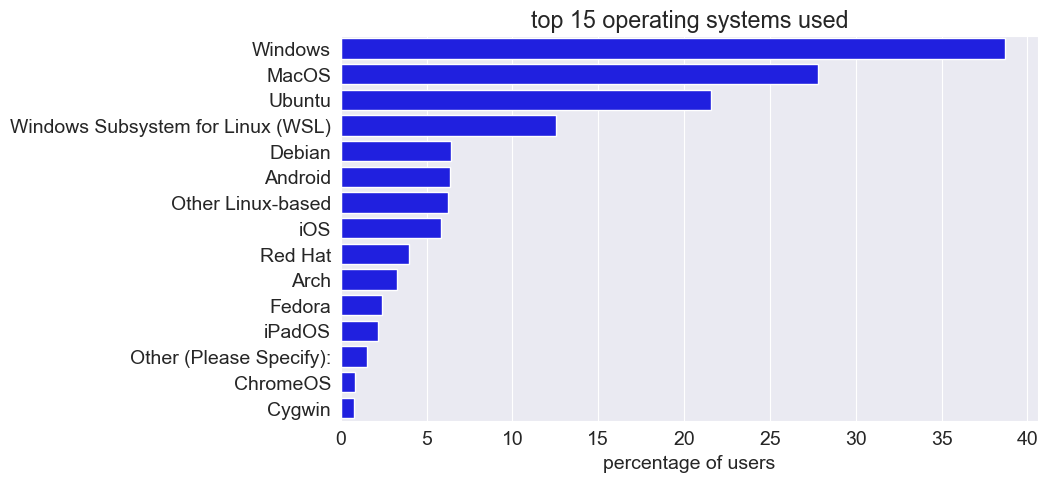

In [206]:
sns.barplot(y=Op_use_pct.index,x=Op_use_pct,color='blue');
plt.title('top 15 operating systems used');
plt.xlabel('percentage of users');

# AI Tools
### AI has been a hot topic throught the year, so lets see what AI related information we can get in this dataset.

In [207]:
AI_search_used=split_multicolumn(survey_df['AISearchHaveWorkedWith'])
AI_search_used_pct=AI_search_used.sum().sort_values(ascending=False)

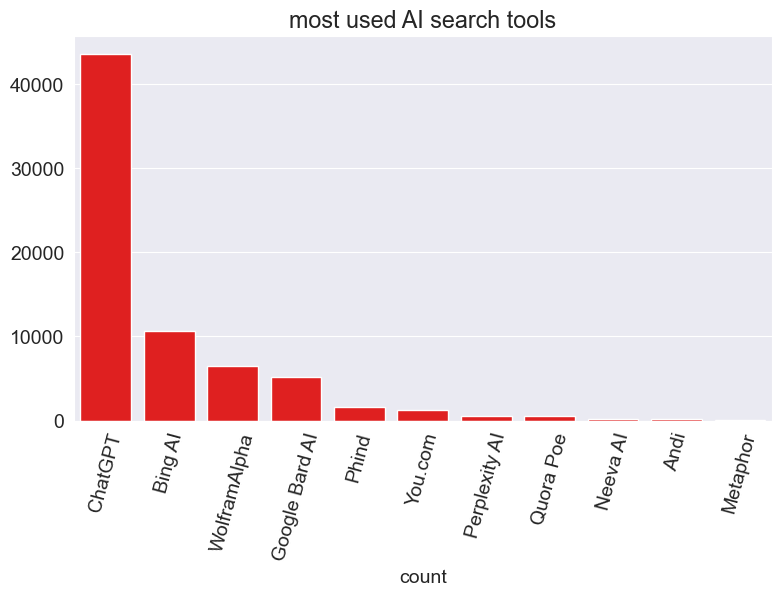

In [208]:
sns.barplot(y=AI_search_used_pct,x=AI_search_used_pct.index,color='red');
plt.title('most used AI search tools');
plt.xticks(rotation=75)
plt.xlabel('count');

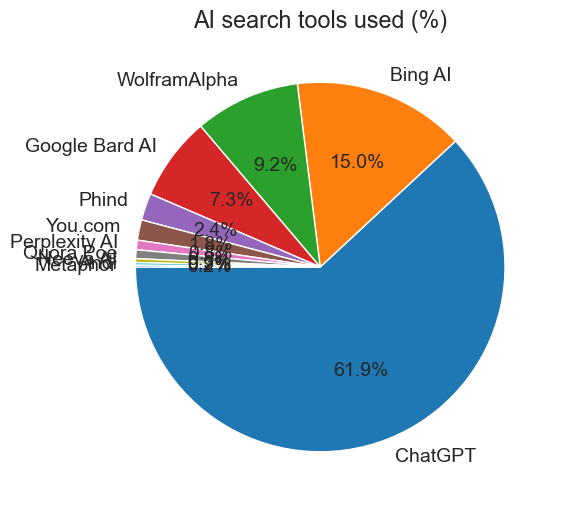

In [209]:
plt.figure(figsize=(6,6))
plt.title('AI search tools used (%)')
plt.pie(AI_search_used_pct,labels=AI_search_used_pct.index,autopct='%1.1f%%',startangle=180);

In [210]:
chatgpt_country_df=survey_df[survey_df.AISearchHaveWorkedWith=='ChatGPT']['Country'].value_counts().head(20)

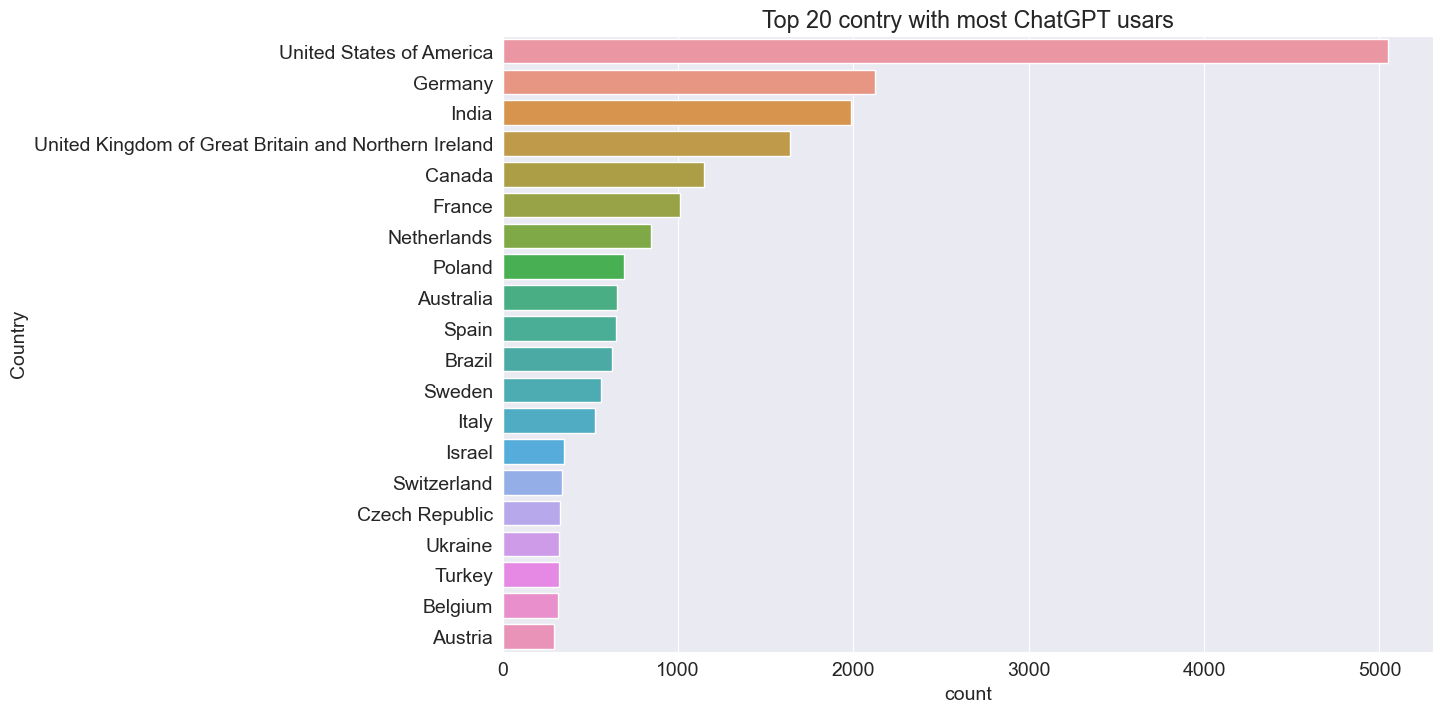

In [211]:
plt.figure(figsize=(12,8))
sns.barplot(x=chatgpt_country_df,y=chatgpt_country_df.index);
plt.title('Top 20 contry with most ChatGPT usars');

In [212]:
AI_dev_used=split_multicolumn(survey_df.AIDevHaveWorkedWith)
AI_dev_used_tot=AI_dev_used.mean().sort_values(ascending=False)*100

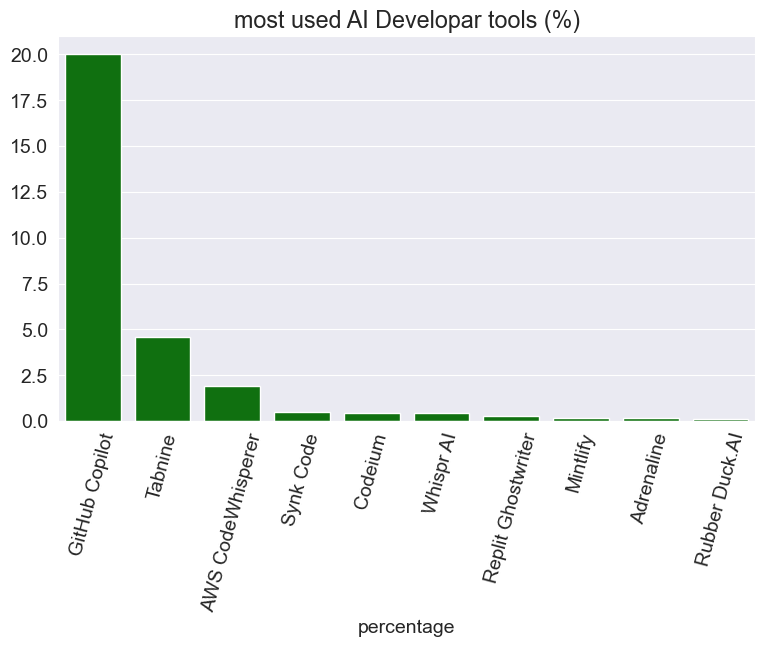

In [213]:
sns.barplot(y=AI_dev_used_tot,x=AI_dev_used_tot.index,color='green');
plt.title('most used AI Developar tools (%)');
plt.xticks(rotation=75)
plt.xlabel('percentage');

### Lets see what tools developars will be using in the coming years

In [214]:
AI_devtool_nextuse_df=split_multicolumn(survey_df['AIDevWantToWorkWith'])
AI_nextuse_dev=AI_devtool_nextuse_df.mean().sort_values(ascending=False)*100

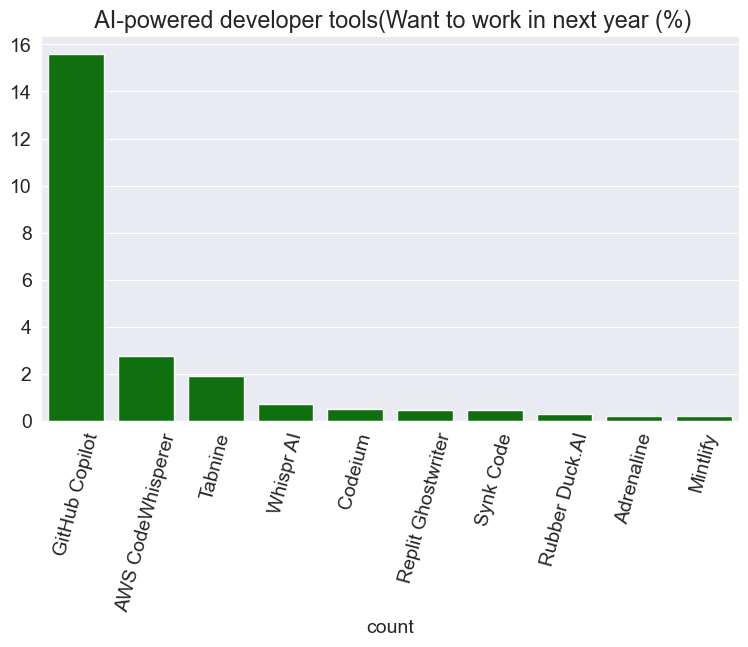

In [215]:
sns.barplot(y=AI_nextuse_dev,x=AI_nextuse_dev.index,color='green');
plt.title(' AI-powered developer tools(Want to work in next year (%)');
plt.xticks(rotation=75)
plt.xlabel('count');

from yhe above two graphs we can see that AWS is going to over take Tabnine. Percentage of GitHub Copilot will go dow but it will still be dominent.

In [216]:
AIsel=survey_df.AISelect.value_counts()

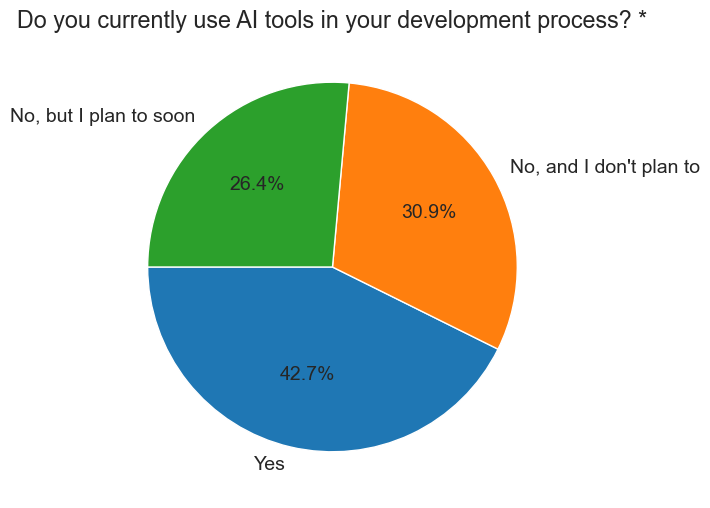

In [217]:
plt.figure(figsize=(6,6))
plt.title(schema_df.AISelect)
plt.pie(survey_df.AISelect.value_counts(),labels=survey_df.AISelect.value_counts().index,autopct='%1.1f%%',startangle=180);